In [1]:
#import libraries
# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import seaborn as sn

# defining some custom functions
def checkNull(dataSet):
    print(dataSet.isnull().sum())

def mapData(dataSet):
    
    # check if Loan_ID exists and drop column since it does not make any difference in the dataset
    if "Loan_ID" in dataSet.columns:
        dataSet.drop("Loan_ID",axis=1,inplace=True)
        
    for i in [dataSet]:
        i.Gender = i['Gender'].map({'Male':0,'Female':1}).astype(int)
        i.Married = i['Married'].map({'Yes':1,'No':0}).astype(int)
        i.Dependents = i['Dependents'].map({'0':0,'1':1,'2':2,'3+':3}).astype(int)
        i.Credit_History = i['Credit_History'].astype(int)
        i.Education = i['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
        i.Self_Employed = i['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
        i.Property_Area = i['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2}).astype(int)
        
    if "Loan_Status" in dataSet.columns:
        for i in [dataSet]:
            i.Loan_Status = i['Loan_Status'].map({'Y':1,'N':0}).astype(int)

    return dataSet

def fillNullVal(dataSet):
    # loan amount and loan amount term would be filled with the median value
    if "LoanAmount" in dataSet.columns:
        for i in [dataSet]:
            i['LoanAmount'] = i['LoanAmount'].fillna(dataSet.LoanAmount.dropna().median())
            i['Loan_Amount_Term'] = i['Loan_Amount_Term'].fillna(dataSet.Loan_Amount_Term.dropna().median())
        
    #fill rest of columns with mode value     
    for i in [dataSet]:
        i['Gender'] = i['Gender'].fillna(dataSet.Gender.dropna().mode()[0])
        i['Married'] = i['Married'].fillna(dataSet.Married.dropna().mode()[0])
        i['Dependents'] = i['Dependents'].fillna(dataSet.Dependents.dropna().mode()[0])
        i['Self_Employed'] = i['Self_Employed'].fillna(dataSet.Self_Employed.dropna().mode()[0])
        i['Credit_History'] = i['Credit_History'].fillna(dataSet.Credit_History.dropna().mode()[0])
   
    return dataSet


    
        
def loadDataset(path):
    dataset = pd.read_csv(path)
    
    print(dataset.shape)
    return dataset

def uniValAnalysis(columnName,graphTitle,ylim):
    # count number of unique values in the column
    data = columnName.value_counts()
    print(data)

    data.plot(kind='bar')
    plt.title(graphTitle)
    plt.ylim(ylim)
    
    plt.show()

def uniValAnalysisSubPlot(nameLists,positions,dataSet):
    fig,axis = plt.subplots(2,4,figsize=(16,10))
    
    for i in range(len(nameLists)):
        print(dataSet[nameLists[i]].value_counts())
        sn.countplot(nameLists[i],data=dataSet,ax=axis[positions[i][0]][positions[i][1]])
            
def checkUniqueVals(dataSet):
    for i in [dataSet]:
        print(i['Gender'].unique())
        print(i['Married'].unique())    
        print(i['Dependents'].unique())    
        print(i['Self_Employed'].unique())    
        print(i['Credit_History'].unique())
        print(i['Education'].unique())    
        print(i['Property_Area'].unique())  
        print(i['Loan_Status'].unique())

def standardizeData(xValues):
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    scaler.fit(xValues)
    standardized_data = scaler.transform(xValues)
    
    return standardized_data

In [2]:
# load dataset
loanDataset = loadDataset("/Users/kwesikod/Documents/education/ysj/ML/Assesment/Assessment Brief-20221031/LoanDatasets.csv")
loanDataset.head()


(631, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


From the above, we can deduce that the dataset has 631 rows and 13 columns.

Prepare the data. Preparing the data includes checking for missing values and handling them,dropping unwanted columns,performing some analysis on the columns, selecting appropriate feature and target values, replacing texts with values. This is just to ensure our model performs well.

In [3]:
# performing a univariate analysis on the columns of the dataset
# Get the column names
# count the number of unique values in the column
# visualise this data using a barchart
# draw some conclusions

In [4]:
# column names
loanDataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      506
Female    112
Name: Gender, dtype: int64
Yes    410
No     218
Name: Married, dtype: int64
0     352
2     107
1     105
3+     52
Name: Dependents, dtype: int64
Y    435
N    196
Name: Loan_Status, dtype: int64
Graduate        494
Not Graduate    137
Name: Education, dtype: int64
No     514
Yes     84
Name: Self_Employed, dtype: int64
1.0    490
0.0     90
Name: Credit_History, dtype: int64
Semiurban    235
Urban        215
Rural        181
Name: Property_Area, dtype: int64


/Users/kwesikod/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kwesikod/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kwesikod/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

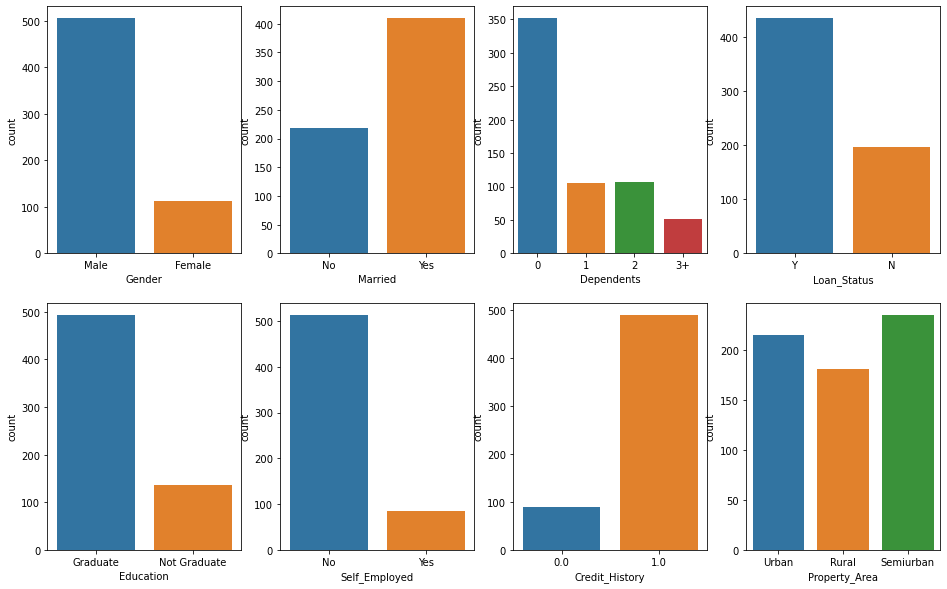

In [5]:
# perform some univariate analysis
nameLists = np.array(['Gender','Married','Dependents','Loan_Status','Education','Self_Employed','Credit_History','Property_Area'])
positions = np.array([[0,0],[0,1],[0,2],[0,3],[1,0],[1,1],[1,2],[1,3]])

uniValAnalysisSubPlot(nameLists,positions,loanDataset)


From the above graphs, we can deduce that:
1. There is a higher percentage of male applicants (about 80%) and about 20% are female applicants
2. More of the applicants are married
3. Applicants with dependants are of lesser number compared to those without dependants
4. Larger number of the applicants have good credit history
5. The number of semiurban applicants is slightly higher
6. A larger percentage of the applicants are educated.
7. More loans have been approved

In [6]:
# check for null values in dataset
checkNull(loanDataset)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        33
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           23
Loan_Amount_Term     14
Credit_History       51
Property_Area         0
Loan_Status           0
dtype: int64


From the above, 7 columns which are Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit History have null values with the latter having the most(51).

All the columns with missing values are categorical except the LoanAmount and Loan_Amount_Term hence we can replace the null values with the mode of these categorical columns

For the rest of the columns ie Loan Amount and Loan Amount Term, we can use the median.

In [7]:
# filling missing values with mode values
loanDataset = fillNullVal(loanDataset)
                                                         
# confirm if all null values have been filled
checkNull(loanDataset)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [8]:
# check the unique data in the various column categorical columns
checkUniqueVals(loanDataset)

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['No' 'Yes']
[1. 0.]
['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


From the above,there are some unique values in these columns, hence we map these values with numbers

In [9]:
# map data
loanDataset = mapData(loanDataset)

# verify if all necessary data has been mapped
loanDataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,127.5,360.0,1,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,1


In [10]:
# Extracting the data and the labels
x = loanDataset.drop(columns='Loan_Status', axis=1)
y = loanDataset['Loan_Status']

print(x)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0           0          1              0             5849   
1         0        1           1          1              0             4583   
2         0        1           0          1              1             3000   
3         0        1           0          0              0             2583   
4         0        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
626       0        1           2          1              0             3073   
627       0        0           0          1              0             1853   
628       0        1           2          1              0             1299   
629       0        0           0          1              0             4950   
630       0        0           1          0              0             3596   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [11]:
# Standardize the data and print out some standardized data
x = standardizeData(x)
print(x[0])


[-0.46454237 -1.3764067  -0.74546522  0.52661935 -0.39187358  0.07947664
 -0.5603697  -0.2152055   0.27504094  0.40787081 -1.22254868]


In [12]:
# split dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2)

x_train.shape, y_train.shape


((441, 11), (441,))

In [13]:
x_test.shape, y_test.shape

((190, 11), (190,))

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7947368421052632

SVM

In [15]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.8

Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8052631578947368

Cross Validation

In [17]:
# Logistic regression model performance using cross_val_score
scores = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x,y,cv=4)
scores

array([0.79746835, 0.78481013, 0.82278481, 0.81528662])

In [18]:
print(np.mean(scores))

0.8050874788357656


In [19]:
# svm model performance using cross_val_score
scores = cross_val_score(SVC(),x, y,cv=4)
scores

array([0.81012658, 0.78481013, 0.8164557 , 0.82165605])

In [20]:
print(np.mean(scores))

0.8082621140046763


In [21]:
# Random forest performance using cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=50),x,y,cv=4)
scores

array([0.80379747, 0.75949367, 0.79746835, 0.81528662])

In [22]:
print(np.mean(scores))

0.7940115294686769


From the above, we can deduce that the SVM gave a better score hence this model can be chosen

Parameter tuning 

In [23]:
clf =SVC(kernel='linear', C=1)

clf.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [24]:
# predicting y_test values
y_pred = clf.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [25]:
# load test dataset
loanTestDataset = loadDataset("/Users/kwesikod/Documents/education/ysj/ML/Assesment/Assessment Brief-20221031/LoanDataset_test.csv")
loanTestDataset.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [26]:
# check for null values in new dataset
checkNull(loanTestDataset)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [27]:
# filling missing values
loanTestDataset = fillNullVal(loanTestDataset)
                                                         
# confirm if all null values have been filled
checkNull(loanTestDataset)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [28]:
# map data
loanTestDataset = mapData(loanTestDataset)

# verify if all necessary data has been mapped
loanTestDataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,110.0,360.0,1,0
1,0,1,1,1,0,3076,1500,126.0,360.0,1,0
2,0,1,2,1,0,5000,1800,208.0,360.0,1,0
3,0,1,2,1,0,2340,2546,100.0,360.0,1,0
4,0,0,0,0,0,3276,0,78.0,360.0,1,0


In [29]:
# Standardize the data and print out some standardized data
testX = standardizeData(loanTestDataset)
print(testX[0])

[-0.48547939  0.75835829 -0.75822199  0.5448117  -0.33484506  0.1864605
 -0.67333511 -0.42677996  0.26602207  0.4376739  -1.12247451]


In [30]:
# predict target values for the actual test data
predY = clf.predict(testX)
predY

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

[[ 20  37]
 [  2 131]]


Text(33.0, 0.5, 'Actual')

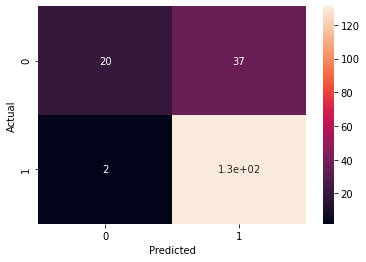

In [31]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)

print(cf)

sn.heatmap(cf, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

